# NLP Fundamentals in Tensorflow

In [1]:
!nvidia-smi

Mon Jun 27 13:20:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Get Helper Functions

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-06-27 13:20:37--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-06-27 13:20:37 (116 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import *

### Dataset

Going to use Kaggle intro to NLP dataset

In [4]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2022-06-27 13:20:39--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 173.194.202.128, 173.194.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2022-06-27 13:20:39 (148 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



### Visualising a Text Dataset

In [5]:
import pandas as pd
import numpy as np

In [6]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [7]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [9]:
df_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [10]:
df_train_shuffled = df_train.sample(frac = 1)

In [11]:
df_train_shuffled.head()

,id,keyword,location,text,target
3694,5256,fatality,"Brentwood, NY",I added a video to a @YouTube playlist http://...,0
3371,4829,evacuation,"Bend, Oregon",Evacuation Advisory for Swayback Ridge Area..v...,1
7523,10759,wreckage,Southern California,Malaysian prime minister says Reunion Island w...,1
6675,9566,thunder,"Decatur, GA",@KristyLeeMusic brings her Alabama thunder bac...,0
7159,10258,war%20zone,"Downtown Churubusco, Indiana",Camping in a war zone with roving raccoons tou...,0


In [12]:
df_train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [13]:
len(df_test)

3263

In [14]:
import random


In [15]:
random_index = random.randint(0, len(df_train) - 5)

In [16]:
for row in df_train_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (real disaster)
Text:
#breakingnews Rly tragedy in MP: Some live to recount horror: ÛÏWhen I saw coaches of my train plunging into wa... http://t.co/eYOrBmF3O3

---

Target: 0 (not real disaster)
Text:
Zone of the Enders MGS2 God of War. RT @D_PageXXI: Quote this with your favorite PS2 game

---

Target: 0 (not real disaster)
Text:
Tennis: Defending champ Svetlana Kuznetsova withdraws from Citi Open cites injury to her lower left leg (ESPN) http://t.co/iM2HdsKlq5

---

Target: 0 (not real disaster)
Text:
'Anyway' the old lady went on 'I have something to ask of you - and you alone.' THE COMING TSUNAMI http://t.co/tYeWZf3hqA

---

Target: 1 (real disaster)
Text:
1 of those days when ya don't realize till already in transit that a train DERAILED at the Metro St closest to work?? https://t.co/QYX5ThkRbH

---



Split into training and validation

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(df_train_shuffled["text"].to_numpy(),
                                                                            df_train_shuffled["target"].to_numpy(),
                                                                            test_size = 0.1,
                                                                            random_state = 42)

### Converting Text to Numbers

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [20]:
text_vectorizer = TextVectorization(
    max_tokens = None,
    standardize = 'lower_and_strip_punctuation',
    split = 'whitespace',
    ngrams = None,
    output_mode = 'int',
    output_sequence_length = None
)

In [21]:
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

Fit TextVectorizer to training text

In [22]:
sample_sentence = "Hello it's raining outside"

In [23]:
text_vectorizer.adapt(train_sentences)

In [24]:
sample_vec = text_vectorizer([sample_sentence])

In [25]:
sample_vec

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1513,   37, 2803,  741,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

Get unique words in vocab

In [26]:
words_in_vocab = text_vectorizer.get_vocabulary()

In [27]:
most_common_words = words_in_vocab[:5]

In [28]:
most_common_words

['', '[UNK]', 'the', 'a', 'in']

oov - out of vocabulary

#### Creating an Embedding layer

* input_dim - size of vocab
* out_dim - size of embedding
* input_length - length of sequence

In [29]:
from tensorflow.keras import layers

In [30]:
embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 128,
                             input_length = max_length)

In [31]:
embedding

In [32]:
random_sentence = random.choice(train_sentences)

In [33]:
random_sentence

'16 dead in Russia bus accident: At least 16 people were killed and 26 others injured when two buses collided i... http://t.co/jMBVPanXR3'

In [34]:
sample_embed = embedding(text_vectorizer(sample_sentence))

In [35]:
sample_embed

<tf.Tensor: shape=(15, 128), dtype=float32, numpy=
array([[-0.01457966, -0.01550434,  0.02172172, ...,  0.04288566,
         0.04343772,  0.02972878],
       [ 0.02896526,  0.01626328,  0.01015458, ...,  0.02544424,
        -0.0492795 , -0.03980406],
       [ 0.04000446, -0.00126518, -0.00806086, ...,  0.04680798,
        -0.0236689 , -0.04775577],
       ...,
       [ 0.02368391, -0.00340364,  0.04731167, ...,  0.02256925,
         0.00645339,  0.00174074],
       [ 0.02368391, -0.00340364,  0.04731167, ...,  0.02256925,
         0.00645339,  0.00174074],
       [ 0.02368391, -0.00340364,  0.04731167, ...,  0.02256925,
         0.00645339,  0.00174074]], dtype=float32)>

### Modelling a Text Dataset

#### Naive Bayes

Will act as baseline

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [37]:
model_0 = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('clf',MultinomialNB())
])

In [38]:
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [39]:
baseline_performance = model_0.score(test_sentences, test_labels)

In [40]:
baseline_performance*100

81.10236220472441

In [41]:
baseline_preds = model_0.predict(test_sentences)

In [42]:
baseline_preds[:20]

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1])

In [43]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [44]:
def calculate_results(y_true, y_pred):
  """Calculates model accuracy"""
  model_accuracy = accuracy_score(y_true, y_pred) *100
  
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}

  return model_results


In [45]:
baseline_results = calculate_results(test_labels, baseline_preds)

In [46]:
baseline_results

{'accuracy': 81.10236220472441,
 'f1': 0.8056213385366573,
 'precision': 0.8229746948861455,
 'recall': 0.8110236220472441}

### Model 1: Simple Dense Model

In [47]:
SAVE_DIR = 'model_logs'

In [48]:
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [49]:
model = tf.keras.Model(inputs, outputs, name = 'model_1_dense')

In [50]:
model.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [51]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [52]:
model.fit(
    train_sentences,
    train_labels,
    epochs = 5,
    callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR, experiment_name = 'model_1_dense')]
)

Saving TensorBoard log files to: model_logs/model_1_dense/20220627-132045
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


215/215 [==============================] - 5s 6ms/step - loss: 0.6143 - accuracy: 0.6980
Epoch 2/5
215/215 [==============================] - 1s 7ms/step - loss: 0.4469 - accuracy: 0.8133
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.3530 - accuracy: 0.8572
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2898 - accuracy: 0.8841
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2431 - accuracy: 0.9085


In [53]:
model.evaluate(test_sentences, test_labels)

16/24 [===================>..........] - ETA: 0s - loss: 0.4081 - accuracy: 0.8105

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


24/24 [==============================] - 0s 4ms/step - loss: 0.4067 - accuracy: 0.8123


[0.4066615104675293, 0.8123359680175781]

In [54]:
model_preds = model.predict(test_sentences)

In [55]:
model_preds.shape

(762, 1)

In [56]:
tf.squeeze(np.round(model_preds[:20]))

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1.], dtype=float32)>

In [57]:
model_dense_results = calculate_results(test_labels, np.round(model_preds))

In [58]:
model_dense_results

{'accuracy': 81.23359580052494,
 'f1': 0.8112338965507089,
 'precision': 0.8122247344855887,
 'recall': 0.8123359580052494}

#### Visualising Learned Embeddings

In [59]:
len(words_in_vocab)

10000

In [60]:
embed_weights = model.get_layer('embedding').get_weights()

In [61]:
embed_weights

[array([[ 0.00602084,  0.01502367,  0.06653024, ...,  0.01200994,
          0.0241552 , -0.01470902],
        [ 0.0079484 ,  0.02065699,  0.05263615, ...,  0.01587135,
          0.00281008,  0.01298044],
        [-0.0463568 , -0.02482565, -0.00210201, ...,  0.02781899,
          0.00309202, -0.04943291],
        ...,
        [ 0.05433653, -0.07939593, -0.0684666 , ...,  0.00181025,
         -0.06543685,  0.00849576],
        [-0.02818294,  0.04721927,  0.08552977, ..., -0.02534232,
          0.10756781, -0.05801333],
        [ 0.01163502,  0.05872467, -0.0062492 , ..., -0.07411076,
          0.00771631,  0.00891813]], dtype=float32)]

In [62]:
embed_weights[0].shape

(10000, 128)

In [63]:
import io

In [64]:
# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0: 
     continue # skip padding token
  vec = embed_weights[0][num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

In [65]:
# # Download files locally to upload to Embedding Projector
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download("embedding_vectors.tsv")
#   files.download("embedding_metadata.tsv")

http://projector.tensorflow.org/

## Recurrent Neural Network

## LSTM

In [66]:
inputs = layers.Input(shape = (1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
x = layers.Dense(64)(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)

model_lstm = tf.keras.Model(inputs, outputs, name = 'model_lstm')

In [67]:
model_lstm.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [68]:
model_lstm.fit(
    train_sentences, 
    train_labels,
    epochs = 5,
    validation_data = (test_sentences, test_labels),
    callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR, experiment_name = 'model_lstm')]
)

Saving TensorBoard log files to: model_logs/model_lstm/20220627-132109
Epoch 1/5
215/215 [==============================] - 8s 11ms/step - loss: 0.2158 - accuracy: 0.9237 - val_loss: 0.5127 - val_accuracy: 0.7966
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1619 - accuracy: 0.9391 - val_loss: 0.5809 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1275 - accuracy: 0.9542 - val_loss: 0.4984 - val_accuracy: 0.7953
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1066 - accuracy: 0.9599 - val_loss: 0.5807 - val_accuracy: 0.7861
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0862 - accuracy: 0.9676 - val_loss: 1.0047 - val_accuracy: 0.7808


In [69]:
model_lstm_preds = model_lstm.predict(test_sentences)

In [70]:
np.round(model_lstm_preds[:10])

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [71]:
model_lstm_results = calculate_results(test_labels, np.round(model_lstm_preds))

In [72]:
model_lstm_results

{'accuracy': 78.08398950131233,
 'f1': 0.7801978277823353,
 'precision': 0.7801698407663346,
 'recall': 0.7808398950131233}

### GRU

In [73]:
inputs = layers.Input(shape = (1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, return_sequences=True)(x)
x = layers.GRU(64)(x)
x = layers.Dense(64, activation = 'relu')(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)

model_gru = tf.keras.Model(inputs, outputs)

In [74]:
model_gru.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                             

In [75]:
model_gru.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [76]:
history_gru = model_gru.fit(
    train_sentences, 
    train_labels,
    epochs = 5,
    validation_data = (test_sentences, test_labels),
    callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR, experiment_name = 'model_gru')]

)

Saving TensorBoard log files to: model_logs/model_gru/20220627-132134
Epoch 1/5
215/215 [==============================] - 5s 10ms/step - loss: 0.1449 - accuracy: 0.9495 - val_loss: 0.7678 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0844 - accuracy: 0.9717 - val_loss: 0.9206 - val_accuracy: 0.7572
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0702 - accuracy: 0.9745 - val_loss: 0.9521 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0604 - accuracy: 0.9715 - val_loss: 1.2465 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0540 - accuracy: 0.9764 - val_loss: 1.2633 - val_accuracy: 0.7467


In [77]:
model_gru_preds = model_gru.predict(test_sentences)

In [78]:
model_gru_results = calculate_results(test_labels, np.round(model_gru_preds))

In [79]:
model_gru_results

{'accuracy': 74.67191601049869,
 'f1': 0.7473113508978257,
 'precision': 0.748646892439416,
 'recall': 0.7467191601049868}

#### Bi-directional RNN

In [80]:
inputs = layers.Input(shape = (1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences = True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
x = layers.Dense(64, activation = 'relu')(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)

model_bidi = tf.keras.Model(inputs, outputs)

In [81]:
model_bidi.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 15, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                                           

In [82]:
model_bidi.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [83]:
model_bidi.fit(
    train_sentences,
    train_labels,
    epochs = 5,
    validation_data = (test_sentences, test_labels),
    callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR, experiment_name = 'model_bidi')]
)

Saving TensorBoard log files to: model_logs/model_bidi/20220627-132148
Epoch 1/5
215/215 [==============================] - 9s 17ms/step - loss: 0.1017 - accuracy: 0.9685 - val_loss: 0.8873 - val_accuracy: 0.7546
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0479 - accuracy: 0.9774 - val_loss: 1.3080 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0501 - accuracy: 0.9750 - val_loss: 1.5234 - val_accuracy: 0.7441
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0436 - accuracy: 0.9794 - val_loss: 1.3478 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0410 - accuracy: 0.9803 - val_loss: 1.6331 - val_accuracy: 0.7428


In [84]:
model_bidi_preds = model_bidi.predict(test_sentences)

In [85]:
model_bidi_results = calculate_results(test_labels, np.round(model_bidi_preds))

In [86]:
model_bidi_results

{'accuracy': 74.2782152230971,
 'f1': 0.7435545298783226,
 'precision': 0.745798768617975,
 'recall': 0.7427821522309711}

#### Conv NNs for Text

In [87]:
embedding_test = embedding(text_vectorizer(["this is a test sentence"]))
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D() 
max_pool_output = max_pool(conv_1d_output) # get the most important features
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [88]:
conv_1d_output

<tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
array([[[1.09689042e-01, 9.71386395e-03, 5.13539985e-02, 1.91058926e-02,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.69488937e-02,
         1.12089384e-02, 3.41033712e-02, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 1.35067552e-02, 0.00000000e+00, 3.47469747e-02,
         4.27243933e-02, 1.49877816e-02, 0.00000000e+00, 0.00000000e+00,
         9.51345116e-02, 0.00000000e+00, 0.00000000e+00, 5.73656037e-02,
         0.00000000e+00, 3.67615186e-02, 0.00000000e+00, 0.00000000e+00,
         4.91495132e-02, 0.00000000e+00, 6.54149503e-02, 9.43699479e-02],
        [0.00000000e+00, 9.40024666e-03, 0.00000000e+00, 8.15843046e-02,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 5.04516996e-02, 2.97249351e-02, 4.04739194e-02,
         1.28406300e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         2.04831865e-02, 1.77491754e-02, 9.78433192e-02, 2.33373549e-0

In [89]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.10968904, 0.00971386, 0.09484991, 0.0815843 , 0.        ,
        0.00204104, 0.03353022, 0.0430347 , 0.01120894, 0.0504517 ,
        0.02972494, 0.04047392, 0.00173757, 0.0789921 , 0.03192199,
        0.04065138, 0.05767689, 0.01774918, 0.09784332, 0.02333735,
        0.09513451, 0.00517439, 0.05178594, 0.0573656 , 0.04742902,
        0.04253234, 0.03793202, 0.0524352 , 0.05966422, 0.02166528,
        0.06541495, 0.09436995]], dtype=float32)>

In [90]:
model_cnn_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_cnn")

# Create 1-dimensional convolutional layer to model sequences

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_cnn_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_cnn = tf.keras.Model(inputs, outputs, name="model_cnn_Conv1D")

# Compile Conv1D model
model_cnn.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [91]:
model_cnn.summary()

Model: "model_cnn_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_cnn (Embedding)   (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_7 (Dense)             (None, 1)            

Fit model

In [92]:
model_5=cnn_history = model_cnn.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(test_sentences, test_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20220627-132222
Epoch 1/5
215/215 [==============================] - 3s 6ms/step - loss: 0.5741 - accuracy: 0.7062 - val_loss: 0.4187 - val_accuracy: 0.8084
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.3550 - accuracy: 0.8520 - val_loss: 0.4174 - val_accuracy: 0.8241
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.2218 - accuracy: 0.9181 - val_loss: 0.4868 - val_accuracy: 0.8005
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.1433 - accuracy: 0.9534 - val_loss: 0.5531 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.1001 - accuracy: 0.9680 - val_loss: 0.6050 - val_accuracy: 0.7992


In [93]:
model_cnn_preds = model_cnn.predict(test_sentences)

In [94]:
model_cnn_results = calculate_results(test_labels, np.round(model_cnn_preds))

In [95]:
model_cnn_results

{'accuracy': 79.92125984251969,
 'f1': 0.7978122813388485,
 'precision': 0.7991317724357303,
 'recall': 0.7992125984251969}

### USE Feature Extractor

(Universal Sentence Encoder)

In [96]:
import tensorflow_hub as hub

In [97]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01330808  0.03169557  0.04467933 -0.02069351  0.07371093  0.06468675
  0.04107149 -0.01221242  0.03320409  0.04404332 -0.0268222  -0.00760506
 -0.05114831  0.05923976  0.04353501 -0.06511343  0.06674623  0.06019811
  0.04422092 -0.06039971 -0.00964755 -0.02678055  0.0382744   0.06271211
 -0.02896257 -0.02786034  0.07290824 -0.04924324 -0.03482293  0.05515445
  0.08417306  0.0488302  -0.03276099 -0.02919566  0.02624284 -0.08441564
  0.01947596 -0.04942407 -0.04052652 -0.05197329  0.05854463  0.00995231
 -0.0198656   0.00677592 -0.0951319  -0.00727446 -0.05872137  0.05583625
  0.02737363 -0.01740019], shape=(50,), dtype=float32)


In [98]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                       input_shape = [],
                                       dtype = tf.string,
                                       trainable = False, 
                                       name = 'USE')

In [99]:
model_use = tf.keras.Sequential([
      sentence_encoder_layer,
      layers.Dense(64, activation = 'relu'),
      layers.Dense(1, activation = 'sigmoid')
], name = 'model_use')

In [100]:
model_use.summary()

Model: "model_use"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_8 (Dense)             (None, 64)                32832     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [101]:
model_use.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [102]:
model_use.fit(
    train_sentences,
    train_labels,
    epochs=5,
    validation_data=(test_sentences, test_labels),
    callbacks=[create_tensorboard_callback(SAVE_DIR, "Conv1D")]
)

Saving TensorBoard log files to: model_logs/Conv1D/20220627-132248
Epoch 1/5
215/215 [==============================] - 5s 13ms/step - loss: 0.5158 - accuracy: 0.7761 - val_loss: 0.3801 - val_accuracy: 0.8451
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4214 - accuracy: 0.8136 - val_loss: 0.3643 - val_accuracy: 0.8451
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4083 - accuracy: 0.8171 - val_loss: 0.3594 - val_accuracy: 0.8360
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3993 - accuracy: 0.8248 - val_loss: 0.3604 - val_accuracy: 0.8399
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3909 - accuracy: 0.8317 - val_loss: 0.3578 - val_accuracy: 0.8399


In [103]:
model_use_preds = model_use.predict(test_sentences)

In [104]:
model_use_results = calculate_results(test_labels, np.round(model_use_preds))

In [105]:
model_use_results

{'accuracy': 83.98950131233596,
 'f1': 0.839161612950555,
 'precision': 0.8398624903280707,
 'recall': 0.8398950131233596}

### TF Hub Model on 10% of Data

In [106]:
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)

In [107]:
model_10pct = tf.keras.models.clone_model(model_use)

In [108]:
model_10pct.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [109]:
model_10pct.fit(
    train_sentences_10_percent,
    train_labels_10_percent,
    epochs=5,
    validation_data=(test_sentences, test_labels),
    callbacks=[create_tensorboard_callback(SAVE_DIR, "Conv1D")]
)

Saving TensorBoard log files to: model_logs/Conv1D/20220627-132315
Epoch 1/5
22/22 [==============================] - 3s 43ms/step - loss: 0.6712 - accuracy: 0.6749 - val_loss: 0.6409 - val_accuracy: 0.7664
Epoch 2/5
22/22 [==============================] - 1s 25ms/step - loss: 0.5991 - accuracy: 0.8149 - val_loss: 0.5704 - val_accuracy: 0.7992
Epoch 3/5
22/22 [==============================] - 1s 25ms/step - loss: 0.5214 - accuracy: 0.8309 - val_loss: 0.5003 - val_accuracy: 0.8189
Epoch 4/5
22/22 [==============================] - 1s 25ms/step - loss: 0.4584 - accuracy: 0.8382 - val_loss: 0.4511 - val_accuracy: 0.8189
Epoch 5/5
22/22 [==============================] - 0s 20ms/step - loss: 0.4142 - accuracy: 0.8426 - val_loss: 0.4259 - val_accuracy: 0.8228


In [110]:
model_10pct_preds = model_10pct.predict(test_sentences)

In [111]:
model_10pct_results = calculate_results(test_labels, np.round(model_10pct_preds))

In [112]:
model_10pct_results

{'accuracy': 82.28346456692913,
 'f1': 0.8215990717695721,
 'precision': 0.8231702492342503,
 'recall': 0.8228346456692913}

### Compare Performance of Models

Combine resutls into df

In [119]:
results = pd.DataFrame({'Baseline': baseline_results,
                        'Dense': model_dense_results,
                        'LSTM': model_lstm_results,
                        'GRU': model_gru_results,
                        'Bidirectional': model_bidi_results,
                        'Conv NN': model_cnn_results,
                        'USE': model_use_results})

In [122]:
results = results.T
results

,accuracy,precision,recall,f1
Baseline,81.102362,0.822975,0.811024,0.805621
Dense,81.233596,0.812225,0.812336,0.811234
LSTM,78.083990,0.780170,0.780840,0.780198
GRU,74.671916,0.748647,0.746719,0.747311
Bidirectional,74.278215,0.745799,0.742782,0.743555
Conv NN,79.921260,0.799132,0.799213,0.797812
USE,83.989501,0.839862,0.839895,0.839162


In [124]:
results['accuracy'] = results['accuracy']/100

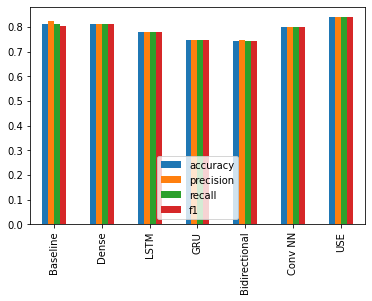

In [125]:
results.plot(kind = 'bar')

#### Upload to TensorBoard

In [126]:
# View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./model_logs \
  --name "NLP modelling experiments" \
  --description "A series of different NLP modellings experiments with various models" \
  --one_shot # exits the uploader when upload has finished


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=NWvqz877egORke8Xp6EhD8vY4U8EHl&prompt=consent&access_type=offline


In [ ]:
# If you need to remove previous experiments, can do so using the following
# !tensorboard dev delete --experiment_id EXPERIMENT_ID_TO_DELETE

#### Finding the Most Wrong Predictions

In [ ]:
val_df = pd.DataFrame({"text": test_sentences,
                       "target": test_labels,
                       "pred": model_use_preds,
                       "pred_prob": tf.squeeze(model_use_preds)})
val_df.head()


In [ ]:
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

In [ ]:
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  
  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(val_sentences) # find prediction time per sample
  
  return total_time, time_per_pred